# Figures
A series of ipython/jupyter notebook cells to plot nice figures. 

## Figures for the presentation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

In [ ]:
# read a CSV file with the system dynamic
csv_file_name = "../local_results/2024-07-02-14-00-00-lotka-volterra/lotka-volterra.csv"
df_ode = pd.read_csv(csv_file_name)
# just consider a small part of the dynamic
df_ode = df_ode.iloc[:3000]

x = df_ode["t"].values
y_X = df_ode["x"].values
y_Y = df_ode["y"].values

figure, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y_X, color='orange', label="x")
ax.plot(x, y_Y, color='green', label="y")
ax.set_xlabel("time")
ax.set_title("Trajectory from Lotka-Volterra's ODE system")
ax.legend(loc='best')

In [ ]:
# it would also be nice to get the Pareto fronts complexity/fitting
import pickle
# load PySRRegressor file for F_x
pysr_x_pickle_file_name = "../local_results/2024-07-02-14-00-00-lotka-volterra/regressor-F_x.pkl"
with open(pysr_x_pickle_file_name, "rb") as fp :
    pysr_x = pickle.load(fp)

complexity = pysr_x.equations_["complexity"].values
error = pysr_x.equations_["loss"].values

figure, ax = plt.subplots()

# now, this block of code plots red horizontal/vertical segments between points
for i in range(1, len(complexity)) :
    start_x = complexity[i-1]
    start_y = error[i-1]
    end_x = complexity[i]
    end_y = error[i]
    
    # first, a horizontal line
    ax.plot([start_x, end_x], [start_y, start_y], color='red')
    # then, a vertical line
    ax.plot([end_x, end_x], [start_y, end_y], color='red', alpha=0.3)
 
ax.scatter(complexity, error, zorder=2)
ax.set_title("Complexity/error Pareto front of equations for F_x")
ax.set_xlabel("complexity")
ax.set_ylabel("error")

In [ ]:
# load PySRRegressor file for F_x
pysr_y_pickle_file_name = "../local_results/2024-07-02-14-00-00-lotka-volterra/regressor-F_y.pkl"
with open(pysr_y_pickle_file_name, "rb") as fp :
    pysr_y = pickle.load(fp)

complexity = pysr_y.equations_["complexity"].values
error = pysr_y.equations_["loss"].values

figure, ax = plt.subplots()

# now, this block of code plots red horizontal/vertical segments between points
for i in range(1, len(complexity)) :
    start_x = complexity[i-1]
    start_y = error[i-1]
    end_x = complexity[i]
    end_y = error[i]
    
    # first, a horizontal line
    ax.plot([start_x, end_x], [start_y, start_y], color='red')
    # then, a vertical line
    ax.plot([end_x, end_x], [start_y, end_y], color='red', alpha=0.3)
 
ax.scatter(complexity, error, zorder=2)
ax.set_title("Complexity/error Pareto front of equations for F_y")
ax.set_xlabel("complexity")
ax.set_ylabel("error")

In [ ]:
print(pysr_y.equations_)

In [ ]:
# another figure, this time let's load the set of candidate ODE systems with their R2 value
r2_values_file_name = "../local_results/2024-07-02-14-00-00-lotka-volterra/candidates_initial_performance.csv"
df_r2 = pd.read_csv(r2_values_file_name)

# some of the R2 values are like -10^380, so let's threshold them
r2_values = np.maximum(df_r2["R2"].values, -1.0)
r2_values = np.sort(r2_values)[::-1]
#print(r2_values)

# some thresholds that will be used for conditional coloring
high = 0.75
medium = 0.50
low = 0.00
lowest = -0.999

y_highest = np.ma.masked_where(r2_values < high, r2_values)
y_high = np.ma.masked_where((r2_values > high) | (r2_values < medium), r2_values)
y_ok = np.ma.masked_where((r2_values > medium) | (r2_values < low), r2_values)
y_bad = np.ma.masked_where((r2_values > low) | (r2_values < lowest), r2_values)
y_worst = np.ma.masked_where(r2_values > lowest, r2_values)

fraction_of_highest = (r2_values > high).sum() / len(r2_values) * 100.0
fraction_of_high = (r2_values > medium).sum() / len(r2_values) * 100.0
fraction_of_ok = (r2_values > low).sum() / len(r2_values) * 100.0

fig, ax = plt.subplots()
x = [i for i in range(0, len(r2_values))]
#ax.scatter(x, r2_values)
ax.scatter(x, y_highest, color="green", label="%.2f%%" % fraction_of_highest)
ax.scatter(x, y_lowest, color="yellow", label="%.2f%%" % fraction_of_high)
ax.scatter(x, y_ok, color="orange", label="%.2f%%" % fraction_of_ok)
ax.scatter(x, y_bad, color="lightcoral")
ax.scatter(x, y_worst, color="red", label="R2 <= -1.0")
ax.set_xlabel("Candidate systems sorted by R2 value")
ax.set_ylabel("R2 value")
ax.set_title("Candidate ODE systems for Lotka-Volterra (%d total)" % len(r2_values))
ax.legend(loc='best')

In [ ]:
# let's now read the trajectory of another ODE system, Rossler
csv_file_name = "2024-07-09-23-20-16-rossler-stable/rossler-stable.csv"
df_ode = pd.read_csv(csv_file_name)
df_ode = df_ode.iloc[:200]

x = df_ode["t"].values
y_X_0 = df_ode["x_0"].values
y_X_1 = df_ode["x_1"].values
y_X_2 = df_ode["x_2"].values

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y_X_0, color="gold", label="x")
ax.plot(x, y_X_1, color="rebeccapurple", label="y")
ax.plot(x, y_X_2, color="slategray", label="z")
ax.set_xlabel("time")
ax.set_title("Trajectory from Rossler's ODE system")
ax.legend(loc='best')


In [ ]:
# we can probably do better
fig, axs = plt.subplots(figsize=(16,6), nrows=1, ncols=3)
axs[0].plot(x, y_X_0, color="gold", label="x")
axs[1].plot(x, y_X_1, color="rebeccapurple", label="y")
axs[2].plot(x, y_X_2, color="slategray", label="z")

axs[0].set_ylabel("x_0")
axs[1].set_ylabel("x_1")
axs[2].set_ylabel("x_2")

for ax in axs :
    ax.set_xlabel("t")
    
fig.suptitle("Trajectories from Rossler's ODE system")
fig.tight_layout()

# Figures from systematic experiments

In [1]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import re as regex
import seaborn as sns

import matplotlib.patches as mpatches

sns.set_style('darkgrid')
# increase font size
sns.set_context("notebook", font_scale=1.1)

{'deltax_order_1_0.00': 0.8461538461538461, 'deltax_order_1_smoothed_w11_0.00': 0.8162393162393162, 'deltax_order_1_smoothed_w15_0.00': 0.7606837606837606, 'deltax_order_1_smoothed_w21_0.00': 0.688034188034188, 'deltax_order_1_smoothed_w25_0.00': 0.6709401709401709, 'deltax_order_1_smoothed_w5_0.00': 0.8418803418803419, 'deltax_order_2_0.00': 0.9401709401709402, 'deltax_order_2_smoothed_w11_0.00': 0.8205128205128205, 'deltax_order_2_smoothed_w15_0.00': 0.782051282051282, 'deltax_order_2_smoothed_w21_0.00': 0.6923076923076923, 'deltax_order_2_smoothed_w25_0.00': 0.6752136752136753, 'deltax_order_2_smoothed_w5_0.00': 0.905982905982906, 'deltax_order_3_0.00': 0.9529914529914529, 'deltax_order_3_smoothed_w11_0.00': 0.8290598290598291, 'deltax_order_3_smoothed_w15_0.00': 0.782051282051282, 'deltax_order_3_smoothed_w21_0.00': 0.6965811965811965, 'deltax_order_3_smoothed_w25_0.00': 0.6752136752136753, 'deltax_order_3_smoothed_w5_0.00': 0.9316239316239316, 'deltax_order_4_0.00': 0.965811965811

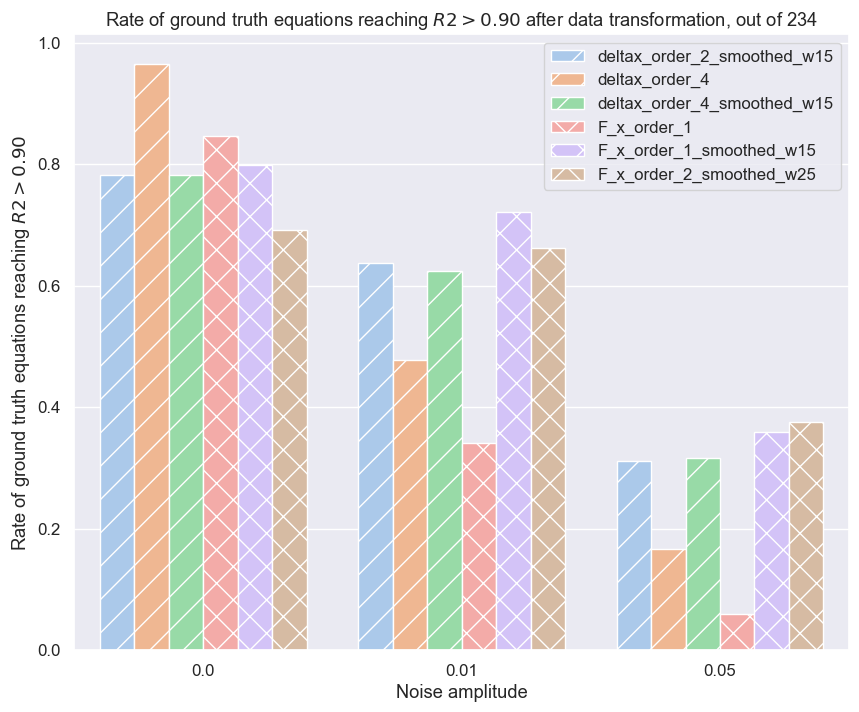

In [2]:
target_file = "../local_results/check_odebench_all_transformations/summary.csv"
r2_threshold = 0.9

df = pd.read_csv(target_file)
number_of_attempts = df.shape[0]

# informative: number of times the R2 for a particular combination of data transformation + noise is higher than 0.9
not_methods = ['system_id', 'variable', 'trajectory_id']
data = {c : (sum(df[c].values > r2_threshold) / df.shape[0]) for c in df.columns if c not in not_methods}
print(data) # this is just for debugging

dictionary = {'noise' : [], 'method' : [], 'performance' : []}
for c in data :
    # add a row, identifying method name and noise from key 'c'
    m = regex.match("([\w|\_]+)\_(0.0[0-9])", c)
    method = m.group(1)
    noise = m.group(2)
    dictionary['noise'].append(float(noise))
    dictionary['method'].append(method)
    dictionary['performance'].append(data[c])

df_data = pd.DataFrame.from_dict(dictionary)

# prepare palette as a dictionary (unused, for the moment)
palette = {
    'deltax_order_1' : '#0072B2',
    'deltax_order_2' : '#0072B2',
    'deltax_order_3' : '#0072B2',
    'deltax_order_2_smoothed' : '#0072B2',
    'F_x_deltat_1' : '#D55E00',
    'F_x_deltat_2' : '#D55E00', 
    'F_x_deltat_3' : '#D55E00',
}

# select just a part of the data, there is too much stuff going on
#df_data = df_data[ df_data['method'].str.startswith('F_x_order_3') ]
#df_data = df_data[ (df_data['method'].str.startswith('F_x') & (df_data['method'].str.endswith('_w25') | df_data['method'].str.endswith('_w15'))) ]

#best_techniques = ['deltax_order_1', 'deltax_order_1_smoothed_w15', 
#                   'deltax_order_2', 'deltax_order_2_smoothed_w15', 
#                   'F_x_order_1', 'F_x_order_1_smoothed_w15', 
#                   'F_x_order_2', 'F_x_order_2_smoothed_w25']
best_techniques = ['deltax_order_4', 'deltax_order_2_smoothed_w15', 'deltax_order_4_smoothed_w15',
                   'F_x_order_1', 'F_x_order_1_smoothed_w15', 'F_x_order_2_smoothed_w25']
df_data = df_data[ df_data['method'].isin(best_techniques) ]
                    
fig, ax = plt.subplots(figsize=(10,8))

ax = sns.barplot(x = 'noise', # or different noise levels
            y = 'performance', # number of times the method went over 0.9
            hue = 'method', # or methods
            data = df_data,
            #palette = palette,
            palette = 'pastel',
            ax=ax)

mark_bars = False
if mark_bars :
    # get all handles and corresponding labels
    handles, labels = ax.get_legend_handles_labels()
    
    for index, bar in enumerate(ax.patches) :
        if index in [3, 4, 5, 12, 13, 14] : #[1, 4, 7, 10, 13, 16] :
            bar.set_hatch('//')
        elif index in [6, 7, 8, 15, 16, 17] :
            bar.set_hatch('x')
        #if labels[index].find("2") != -1 :
        #    bar.set_hatch('//')
        #elif labels[index].find("3") != -1 :
        #    bar.set_hatch('x')
    
    print(handles)
    print(labels)
    new_handles = []
    for i in range(0, len(handles)) :
        hatch = ''
        if i == 1 or i == 4 :
            hatch = '//'
        elif i == 2 or i == 5 :
            hatch = 'x'
        new_handles.append( mpatches.Patch(facecolor=handles[i].get_facecolor(), hatch=hatch, label=labels[i]) )
    
    ax.legend(handles=new_handles, title="method")

# let's try another method
#num_locations = len(df_data['noise'].unique())
#hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
#for i, bar in enumerate(ax.patches):
#    if i % num_locations == 0:
#        hatch = next(hatches)
#    bar.set_hatch(hatch)

for i, bar in enumerate(ax.patches) :
    #if i < 3 * len([t for t in best_techniques if t.startswith("deltax")]) :
    #    bar.set_hatch('//')
    #else :
    #    bar.set_hatch('\\')
    if bar.get_label().startswith("deltax") or i < 3 * len([t for t in best_techniques if t.startswith("deltax")]) :
        bar.set_hatch('/')
    else :
        bar.set_hatch('x')

ax.legend(loc='best')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=6, fancybox=True, shadow=True)

ax.set_xlabel("Noise amplitude")
ax.set_ylabel("Rate of ground truth equations reaching $R2>%.2f$" % r2_threshold)
ax.set_title("Rate of ground truth equations reaching $R2>%.2f$ after data transformation, out of %d" % (r2_threshold, number_of_attempts))
plt.savefig("../local_results/check_odebench_all_transformations/global_performance_selected.png", dpi=150)

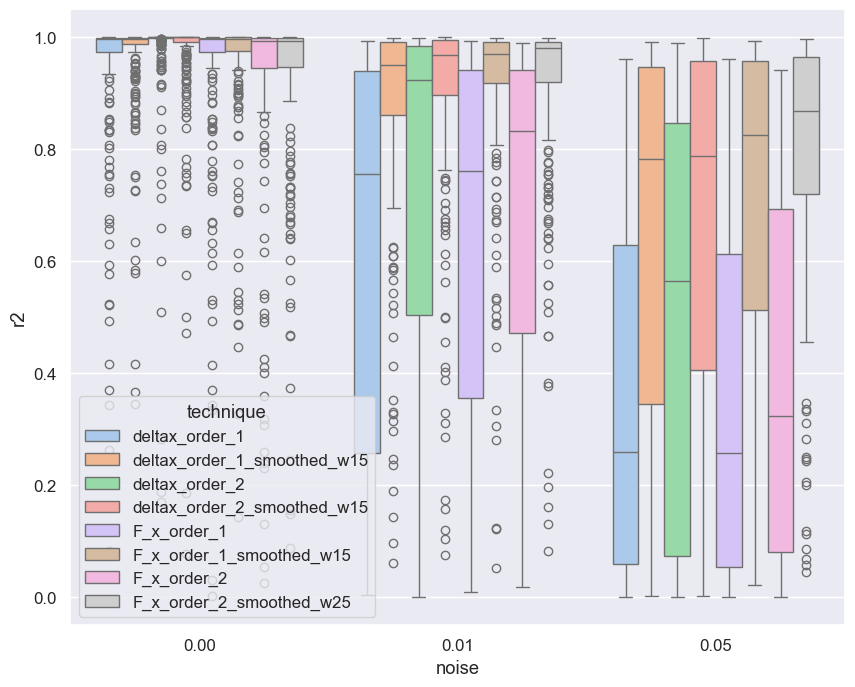

In [3]:
# let's try another figure! this time, a boxplot; but for that, we need to rearrange all the data
best_techniques = ['deltax_order_1', 'deltax_order_1_smoothed_w15', 
                   'deltax_order_2', 'deltax_order_2_smoothed_w15', 
                   'F_x_order_1', 'F_x_order_1_smoothed_w15', 
                   'F_x_order_2', 'F_x_order_2_smoothed_w25']
dictionary_boxplot = {'technique' : [],
                      'noise' : [],
                      'system_id' : [],
                      'trajectory_id' : [],
                      'variable' : [],
                      'r2' : [],
                     }
interesting_columns = [c for c in df.columns if c not in not_methods]

for index, row in df.iterrows() :
    for c in interesting_columns :
        m = regex.match("([\w|\_]+)\_(0.0[0-9])", c)
        technique = m.group(1)
        noise = m.group(2)

        if technique in best_techniques and row[c] > 0.0 :
            dictionary_boxplot['technique'].append(technique)
            dictionary_boxplot['noise'].append(noise)
            dictionary_boxplot['system_id'].append(row['system_id'])
            dictionary_boxplot['trajectory_id'].append(row['trajectory_id'])
            dictionary_boxplot['variable'].append(row['variable'])
            dictionary_boxplot['r2'].append(row[c])

df_boxplot = pd.DataFrame.from_dict(dictionary_boxplot)

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.boxplot(x = 'noise', # or different noise levels
            y = 'r2', # number of times the method went over 0.9
            hue = 'technique', # or methods
            data = df_boxplot,
            palette = 'pastel',
            ax = ax)

Selected methods: ['deltax_order_1' 'deltax_order_1_smoothed_w11'
 'deltax_order_1_smoothed_w15' 'deltax_order_1_smoothed_w21'
 'deltax_order_1_smoothed_w25' 'deltax_order_1_smoothed_w5'
 'deltax_order_2' 'deltax_order_2_smoothed_w11'
 'deltax_order_2_smoothed_w15' 'deltax_order_2_smoothed_w21'
 'deltax_order_2_smoothed_w25' 'deltax_order_2_smoothed_w5'
 'deltax_order_3' 'deltax_order_3_smoothed_w11'
 'deltax_order_3_smoothed_w15' 'deltax_order_3_smoothed_w21'
 'deltax_order_3_smoothed_w25' 'deltax_order_3_smoothed_w5'
 'deltax_order_4' 'deltax_order_4_smoothed_w11'
 'deltax_order_4_smoothed_w15' 'deltax_order_4_smoothed_w21'
 'deltax_order_4_smoothed_w25' 'deltax_order_4_smoothed_w5'
 'deltax_order_5' 'deltax_order_5_smoothed_w11'
 'deltax_order_5_smoothed_w15' 'deltax_order_5_smoothed_w21'
 'deltax_order_5_smoothed_w25' 'deltax_order_5_smoothed_w5']
    noise          method  performance
18    0.0  deltax_order_4     0.965812
24    0.0  deltax_order_5     0.965812
    noise          

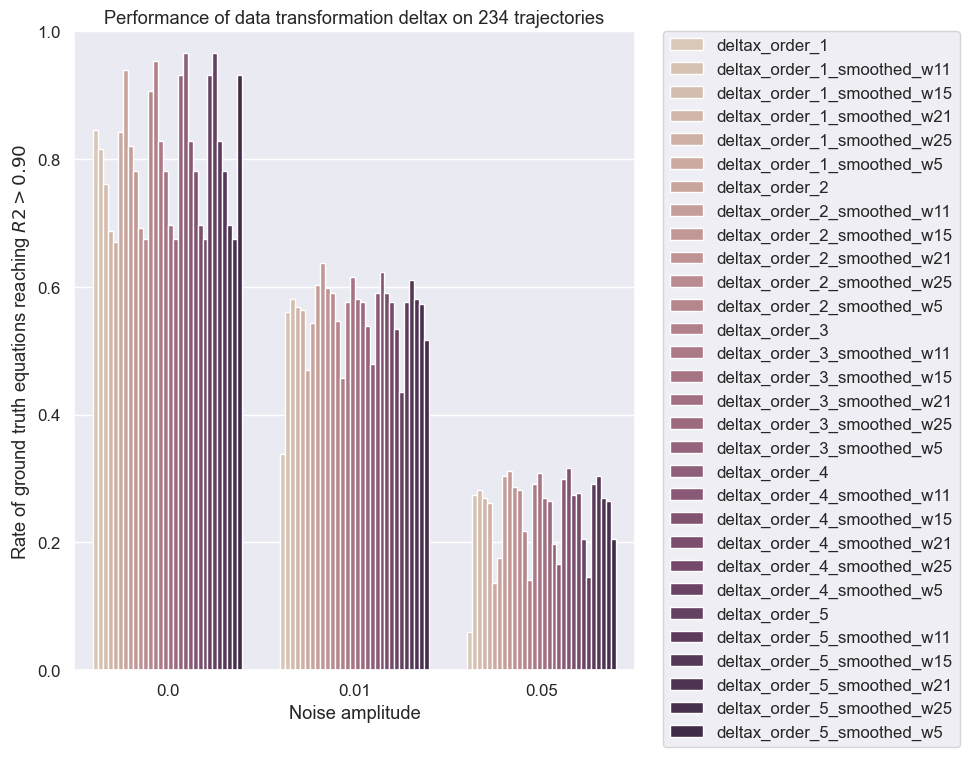

In [32]:
# let's go for another image! this time, we want a barplot just for delta_x and one for F_x
# 'df_data' has already been pre-computed above, but also kinda mangled; let's compute it again
target_file = "../local_results/check_odebench_all_transformations/summary.csv"
r2_threshold = 0.9
transformation = 'deltax'

# we might use Latex syntax for everything; but this requires a lot of parsing and transforming labels
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

df = pd.read_csv(target_file)
number_of_attempts = df.shape[0]

# informative: number of times the R2 for a particular combination of data transformation + noise is higher than 0.9
not_methods = ['system_id', 'variable', 'trajectory_id']
data = {c : (sum(df[c].values > r2_threshold) / df.shape[0]) for c in df.columns if c not in not_methods}
#print(data) # this is just for debugging

dictionary = {'noise' : [], 'method' : [], 'performance' : []}
for c in data :
    # add a row, identifying method name and noise from key 'c'
    m = regex.match("([\w|\_]+)\_(0.0[0-9])", c)
    method = m.group(1)
    noise = m.group(2)
    dictionary['noise'].append(float(noise))
    dictionary['method'].append(method)
    dictionary['performance'].append(data[c])

df_data = pd.DataFrame.from_dict(dictionary)

# select just columns related to the transformation
df_data = df_data[df_data['method'].str.startswith(transformation)]
print("Selected methods:", df_data['method'].unique())

# for each level of noise, find the highest-performing method
for noise_level in df_data['noise'].unique() :
    df_s = df_data[df_data['noise'] == noise_level]
    max_row = df_s[df_s['performance'] == df_s['performance'].max()]
    print(max_row)

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x = 'noise', # or different noise levels
            y = 'performance', # number of times the method went over 0.9
            hue = 'method', # or methods
            data = df_data,
            #palette = 'pastel',
            #palette = sns.color_palette("husl", n_colors=len(df_data['method'].unique())),
            palette = sns.cubehelix_palette(n_colors=len(df_data['method'].unique()), start=0, rot=0.5, dark=0.2, light=0.8),
            #palette = sns.color_palette("pastel", n_colors=len(df_data['method'].unique())),
            ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_title("Performance of data transformation %s on %d trajectories" % (transformation, number_of_attempts))
ax.set_xlabel("Noise amplitude")
ax.set_ylabel("Rate of ground truth equations reaching $R2>%.2f$" % r2_threshold)
ax.set_ylim([0.0, 1.0])
plt.tight_layout()#(pad=3.0)

plt.savefig("../local_results/check_odebench_all_transformations/global_performance_" + transformation + ".png", dpi=150)

# Figure for the introduction
This is just a simple visualization of the trajectories for a dynamical system.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# stuff for Latex
plt.rcParams.update({
    "text.usetex": True,
})


sns.set_style('darkgrid')

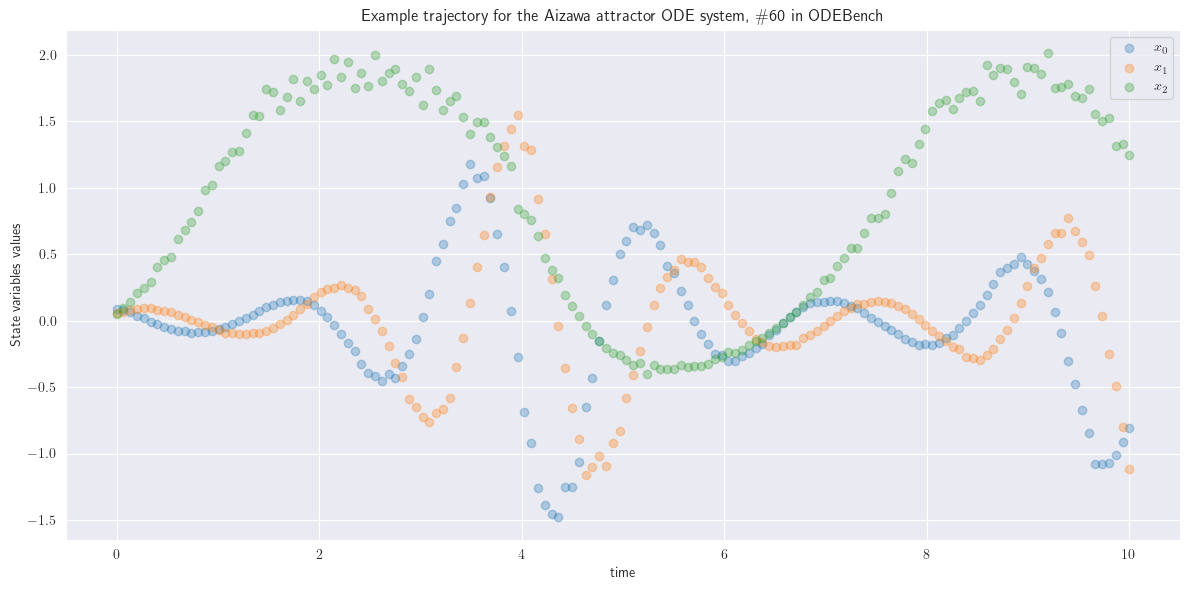

In [10]:
# load a trajectory with several state variables (noisy and non noisy)
file_trajectory = "../local_results/check_odebench_all_transformations/60-aizawa-attractor-chaotic/trajectory-0-noise-0.00.csv"
file_noisy = "../local_results/check_odebench_all_transformations/60-aizawa-attractor-chaotic/trajectory-0-noise-0.05.csv"

df_trajectory = pd.read_csv(file_trajectory)
df_noisy = pd.read_csv(file_noisy)

fig, ax = plt.subplots(figsize=(12,6))
t = df_trajectory["t"].values
for c in [c for c in df_trajectory.columns if c != 't'] :
    #element = ax.plot(t, df_trajectory[c].values, label=c)
    ax.scatter(t, df_noisy[c].values, alpha=0.3, label="$" + c + "$") #, color=element[0].get_color())

ax.set_xlabel('time')
ax.set_ylabel('State variables values')
ax.set_title("Example trajectory for the Aizawa attractor ODE system, \#60 in ODEBench")
ax.legend(loc='best')

fig.tight_layout()
plt.savefig("../figures/introduction-aizawa.png", dpi=150)

# Table from systematic experiments
Let's create a table, starting from the results of several systematic experiments.

In [ ]:
import pandas as pd
import re as regex

In [39]:
target_file = "../local_results/check_odebench_all_transformations/summary.csv"
output_file = "../local_results/check_odebench_all_transformations/table.tex"
#best_techniques = ['deltax_order_1', 'deltax_order_1_smoothed_w15', 
#                   'deltax_order_2', 'deltax_order_2_smoothed_w15', 
#                   'F_x_order_1', 'F_x_order_1_smoothed_w15', 
#                   'F_x_order_2', 'F_x_order_2_smoothed_w25']
#technique2latex = {'deltax_order_1' : r'$\Delta x^1$', 'deltax_order_1_smoothed_w15' : r'$\Delta x^1$,w15',
#                   'deltax_order_2' : r'$\Delta x^2$', 'deltax_order_2_smoothed_w15' : r'$\Delta x^2$,w15',
#                   'F_x_order_1' : r'$F_x^1$', 'F_x_order_1_smoothed_w15' : r'$F_x^1$,w15', 
#                   'F_x_order_2' : r'$F_x^2$', 'F_x_order_2_smoothed_w25' : r'$F_x^2$,w25'}
best_techniques = ['deltax_order_4', 'deltax_order_2_smoothed_w15', 'deltax_order_4_smoothed_w15',
                   'F_x_order_1', 'F_x_order_1_smoothed_w15', 'F_x_order_2_smoothed_w25']
technique2latex = {'deltax_order_4' : r'$\Delta x^4$', 'deltax_order_2_smoothed_w15' : r'$\Delta x^2$,w15', 
                   'deltax_order_4_smoothed_w15' : r'$\Delta x^4$,w15', 'F_x_order_1' : r'$F_x^1$',
                   'F_x_order_1_smoothed_w15' : r'$F_x^1$,w15', 'F_x_order_2_smoothed_w25' : r'$F_x^2$,w25'}
html_colors = {
    'best' : 'ccff00',
    'good' : 'a0d6b4',
    'bad' : 'ee82ee',
    'worst' : 'a74ac7',
    }
table_noise_level = 0.05 # we only care about one level of noise, at the moment
number_of_tables = 3

df = pd.read_csv(target_file)

In [40]:
# start creating a string which encodes a Latex table; the columns of the table are: system id, state variable, trajectory
# plus a column for each technique considered. It's probably better to have separate tables for different levels of noise

latex_table = r'\begin{table}[htb]' + '\n'
latex_table += r'\centering' + '\n'
latex_table += r'\resizebox{0.99\textwidth}{!}{%' + '\n'

# create an header for the 'tabular' inside the table environment
tabular_header = r'\begin{tabular}{' + 'c' * (len(best_techniques) + 3) + r'}' + '\n'
tabular_header += r'\textbf{Id} & \textbf{Var} & \textbf{T}'

for t in best_techniques :
    tabular_header += r'& ' + technique2latex[t]
tabular_header += r'\\' + '\n'

tabular_header += r'\hline' + '\n'

# add tabular header to the table
latex_table += tabular_header

# get the list of interesting columns
interesting_columns = [b + "_%.2f" % table_noise_level for b in best_techniques]

# utility variables, to be used to draw some lines in the table, or separate tabular environments
total_number_of_rows = df.shape[0]
split_point = int(total_number_of_rows / number_of_tables)
split_table = False
current_system_id = -1

for index, row in df.iterrows() :

    if index != 0 and index % split_point == 0 :
        split_table = True
    
    if row['system_id'] != current_system_id :
        latex_table += '\hline' + '\n'
        current_system_id = row['system_id']

        # also, if we previously decided to split the table, this is the moment to do it
        if split_table == True :
            # wrap up the tabular environment
            latex_table += r'\end{tabular}%' + '\n\n' + r'\quad' + '\n\n'
            # start a new tabular environment
            latex_table += tabular_header
            # reset the variable
            split_table = False
        
    latex_table += str(row['system_id']) + r' & $' + str(row['variable']) + r'$ & ' + str(row['trajectory_id']+1) + ' '
    for c in interesting_columns :
        r2_value = row[c]
        performance = 'best'
        if r2_value <= 0.99 and r2_value > 0.9 :
            performance = 'good'
        elif r2_value <= 0.9 and r2_value > 0.5 :
            performance = 'bad'
        elif r2_value <= 0.5 :
            performance = 'worst'
        latex_table += r'& \cellcolor[HTML]{' + html_colors[performance] + r'}'
        latex_table += "%.4f" % r2_value 
    latex_table += r' \\' + '\n'

# let's wrap up the table
latex_table += r'\end{tabular}%' + '\n'
latex_table += r'}' + '\n' # end of the resizebox
latex_table += r'\end{table}' + '\n'

with open(output_file, "w") as fp :
    fp.write(latex_table)

# Table for delta_t experiments
Another Latex table.

In [3]:
import pandas as pd

In [4]:
results_file = "../local_results/variable-deltat-experiments-noise-0.05/results.csv"
output_latex_file = "../local_results/variable-deltat-experiments-noise-0.05/table.tex"

df = pd.read_csv(results_file)
delta_t_values = df["delta_t"].unique()
system_ids = df["system_id"].unique()

transformations = ["deltax", "F_x"]
transformation2latex = {'deltax' : r'$\Delta x$', 'F_x' : r'$F_x$'}
html_colors = {
    'best' : 'ccff00',
    'good' : 'a0d6b4',
    'bad' : 'ee82ee',
    'worst' : 'a74ac7',
    }

# I want a table that has: system_id, state_variable, trajectory; and then, 6 columns (transformation x3 different delta_t)
latex_table = r'\begin{table}[htb]' + '\n'
latex_table += r'\caption{Performance of the transformation approaches for decreasing values of $\Delta t$.\label{table:deltat}}' + '\n'
latex_table += r'\centering' + '\n'
latex_table += r'\resizebox{0.99\columnwidth}{!}{%' + '\n'

# create an header for the 'tabular' inside the table environment; it's a bit complex, because it's using both multirow and multicolumn
latex_table += r'\begin{tabular}{' + 'c|c|c'
for transformation in transformations :
    latex_table += r'|' + 'c' * len(delta_t_values)
latex_table += r'}' + '\n'
latex_table += r'\multirow{2}{*}{\textbf{System id}} & \multirow{2}{*}{\textbf{Trajectory}} & \multirow{2}{*}{\textbf{Variable}}'
for transformation_index, transformation in enumerate(transformations) :
    layout = 'c'
    if transformation_index != len(transformation)-1 :
        layout = 'c|'
    latex_table += r'& \multicolumn{' + str(len(delta_t_values)) + r'}{' + layout + r'}{\textbf{' + transformation2latex[transformation] + r'}}'   
latex_table += r'\\' + '\n'

latex_table += r'& &'
for transformation in transformations :
    for delta_t in delta_t_values :
        latex_table += r' & $\Delta t = ' + str(delta_t) + r'$'
latex_table += r'\\ \hline \hline' + '\n'

# ok, so now we would like to iterate over the systems in the table and present them with: system id, then 
for system_id in system_ids :
    df_system = df[df["system_id"] == system_id]
    trajectories = df_system["trajectory_id"].unique()
    system_id_added_to_table = False
    
    # iterate over the trajectories
    for trajectory_id in trajectories :
        df_trajectory = df_system[df_system["trajectory_id"] == trajectory_id]
        trajectory_id_added_to_table = False
        state_variables = df_trajectory["variable"].unique()

        # is it enough to add the cline immediately before the second trajectory?
        if trajectory_id == 2 :
            latex_table += '\cline{2-9}' + '\n'

        for variable in state_variables :
            # finally, we can add the row to the table!
            if not system_id_added_to_table :
                latex_table += r'\multirow{' + '%d' % (len(trajectories) * len(state_variables)) + r'}{*}{' + str(system_id) + r'}'
                system_id_added_to_table = True
            latex_table += r' &'
            if not trajectory_id_added_to_table :
                latex_table += r'\multirow{' + '%d' % (len(state_variables)) + r'}{*}{' + str(trajectory_id) + r'}'
                trajectory_id_added_to_table = True
            latex_table += r' &'

            latex_table += r' $' + str(variable) + r'$'

            # now, here we need to do something a bit sophisticated
            for transformation in transformations :
                for delta_t in delta_t_values :
                    row = df_trajectory[(df_trajectory["variable"]==variable) & (df_trajectory["delta_t"]==delta_t)].iloc[0]
                    r2_value = row[transformation]
                    # we also add some color, depending on performance
                    performance = 'best'
                    if r2_value <= 0.99 and r2_value > 0.9 :
                        performance = 'good'
                    elif r2_value <= 0.9 and r2_value > 0.5 :
                        performance = 'bad'
                    elif r2_value <= 0.5 :
                        performance = 'worst'
                    latex_table += r'& \cellcolor[HTML]{' + html_colors[performance] + r'}'
                    latex_table += '%.4f' % r2_value

            latex_table += r'\\' + '\n'

    # at the end of each system, we can just add a line
    latex_table += r'\hline \hline' + '\n'

# properly wrap up tabular and table
# let's wrap up the table
latex_table += r'\end{tabular}%' + '\n'
latex_table += r'}' + '\n' # end of the resizebox
latex_table += r'\end{table}' + '\n'

print("Saving table to file \"%s\"..." % output_latex_file)
with open(output_latex_file, "w") as fp :
    fp.write(latex_table)

Saving table to file "../local_results/variable-deltat-experiments-noise-0.05/table.tex"...


# Quick check of R2 values
Comparing the R2 values of the noiseless trajectories vs trajectories with added noise

In [11]:
import numpy as np
import os
import pandas as pd
import sys
from sklearn.metrics import r2_score

In [19]:
results_folder = "../local_results/check_odebench_all_transformations"
target_file = "trajectory-0-noise-0.00.csv"

trajectory_indexes = [0, 1]
noise_amplitude = 0.05
r2_threshold = 0.9

# list all folders
system_folders = [os.path.join(results_folder, f) for f in os.listdir(results_folder) if os.path.isdir(os.path.join(results_folder, f))]
#print("Folders:", system_folders)

# iterate over folders, trajectories, noise
all_r2_values = []
for folder in system_folders :
    print("Now working on system \"%s\"..." % os.path.basename(folder))
    for trajectory_index in trajectory_indexes :
        print("- Trajectory %d" % trajectory_index)
        # read noiseless trajectory data
        df = pd.read_csv(os.path.join(folder, "trajectory-%d-noise-0.00.csv" % trajectory_index))
        state_variables = [c for c in df.columns if c != 't']
        df_noise = pd.read_csv(os.path.join(folder, "trajectory-%d-noise-%.2f.csv" % (trajectory_index, noise_amplitude)))

        # compare all variables in the trajectories
        for v in state_variables :
            r2_value = r2_score(df[v].values, df_noise[v].values)
            print("-- Variable \"%s\", noise %.2f, R2=%.4f" % (v, noise_amplitude, r2_value))
            all_r2_values.append(r2_value)

print("Mean R2 for noise %s: %.4f (%.4f)" % (noise_amplitude, np.mean(all_r2_values), np.std(all_r2_values)))
print("Number of trajectories with R2 > %.2f: %d" % (r2_threshold, len([x for x in all_r2_values if x > r2_threshold])))

Now working on system "1-rc-circuit-charging-capacitor"...
- Trajectory 0
-- Variable "x_0", noise 0.05, R2=0.9929
- Trajectory 1
-- Variable "x_0", noise 0.05, R2=0.9834
Now working on system "10-refined-language-death-model-for-two-languages"...
- Trajectory 0
-- Variable "x_0", noise 0.05, R2=0.9943
- Trajectory 1
-- Variable "x_0", noise 0.05, R2=0.9959
Now working on system "11-naive-critical-slowing-down-statistical-mechanics"...
- Trajectory 0
-- Variable "x_0", noise 0.05, R2=0.9938
- Trajectory 1
-- Variable "x_0", noise 0.05, R2=0.9925
Now working on system "12-photons-in-a-laser-simple"...
- Trajectory 0
-- Variable "x_0", noise 0.05, R2=0.2976
- Trajectory 1
-- Variable "x_0", noise 0.05, R2=0.9782
Now working on system "13-overdamped-bead-on-a-rotating-hoop"...
- Trajectory 0
-- Variable "x_0", noise 0.05, R2=0.9737
- Trajectory 1
-- Variable "x_0", noise 0.05, R2=0.8627
Now working on system "14-budworm-outbreak-model-with-predation"...
- Trajectory 0
-- Variable "x_0", n

# Table for misleading optima
Comparing the performance of ground truth equations versus misleading optima found by SR.

In [56]:
import json
import os
import pandas as pd
import re as regex
import sympy

from sklearn.metrics import r2_score
from sympy.utilities.lambdify import lambdify

In [93]:
# this is a utility function to approximate complexity by counting the number of elements in a sympy expression
def count_elements(expr):
    if not expr.args:  # Base case: no further sub-expressions
        return 1
    return 1 + sum(count_elements(arg) for arg in expr.args)

# Recursive function to apply rounding to all numerical parts of the expression
def round_expr(expr, digits):
    if expr.is_Atom:  # Base case: constants, symbols, numbers
        if expr.is_number:  # If it's a number, round it
            return expr.evalf(digits)
        return expr  # Symbols remain unchanged
    else:  # Recursive case: traverse arguments
        return expr.func(*[round_expr(arg, digits) for arg in expr.args])

In [95]:
odebench_file = "../data/odebench/all_odebench_trajectories.json"
# read the JSON file
odebench = json.load(open(odebench_file, "r"))

results_folder = "../local_results/approximation-comparison-sr-modified"
transformations = {
    'deltax_order_4' : {'variable_template' : '%s_deltax', 'latex' : r'$\Delta ' + '%s' + r'$' }, 
    'F_x_order_1' : {'variable_template' : 'F_%s', 'latex' : r'$F_{' + '%s' + r'}$' }
}

# get the list of all folders
system_folders = [os.path.join(results_folder, f) for f in os.listdir(results_folder) if os.path.isdir(os.path.join(results_folder, f))]

# and start building the latex table
latex_table = r"\begin{table*}" + '\n'
latex_table += r"    \caption{Results of the SR experiments using \texttt{PySR}.\label{table:pysr}}" + '\n'
latex_table += r"    \resizebox{0.99\textwidth}{!}{%" + '\n'
latex_table += r"    \begin{tabular}{c|c|c||c|c|c|c|c|c}" + '\n'
latex_table += r"    \multirow{2}{*}{\textbf{System id}} & \multirow{2}{*}{\textbf{Trajectory}} & \multirow{2}{*}{\textbf{Variable}} & \multicolumn{2}{c|}{\textbf{Ground truth equation}} & \multicolumn{2}{c|}{\textbf{Eq. similar complexity}} & \multicolumn{2}{c}{\textbf{Eq. best $R2$}}\\ \cline{4-9}" + '\n'
latex_table += r"         & & & Form & $R2$ & Form & $R2$ & Form & $R2$\\ " + '\n\n'

for system_folder in system_folders :
    # find system id from folder file name
    m = regex.search("system\-([0-9]+)", system_folder)
    system_id = int(m.group(1))
    system_id_added_to_table = False

    latex_table += '\hline \hline' + '\n'

    # iterate over trajectories
    for trajectory_index in range(0,2) :
        # latex table: again, multirow field (number of variables) * (number of transformations)
        trajectory_added_to_table = False
        if trajectory_index == 1 :
            latex_table += r"\cline{2-9}" + '\n'
        
        print("Now working on system \"%s\", trajectory %d..." % (system_folder, trajectory_index))
        for transformation in transformations :
            if transformation != 'deltax_order_4' :
                latex_table += r"\cline{3-9}" + '\n'
            # read corresponding trajectory file
            trajectory_file = "trajectory-%d-noise-0.00_%s.csv" % (trajectory_index, transformation)
            df_trajectory = pd.read_csv(os.path.join(system_folder, trajectory_file))
            # get original state variables
            state_variables = [c for c in df_trajectory.columns if c.startswith("x") and c.find("deltax") == -1]
            print("State variables:", state_variables)
            # for each state variable
            for state_variable_index, state_variable in enumerate(state_variables) :
                # get the name of the columns for the original transformed data and the ground truth prediction
                target_variable = transformations[transformation]['variable_template'] % state_variable
                ground_truth_prediction = target_variable + "_pred"
                print("Target variable is \"%s\"!" % target_variable)

                # latex table: add target variable, using the proper format;
                if not system_id_added_to_table :
                    # latex table: multirow field with (number of variables) * (number of trajectories) * (number of transformations)
                    multirow = 3 * 2 * len(transformations) # hard-coded
                    latex_table += r"\multirow{" + str(multirow) + r"}{*}{" + str(system_id) + r"}"
                    system_id_added_to_table = True
                latex_table += r' & '
                if not trajectory_added_to_table :
                    multirow = 3 * len(transformations)
                    latex_table += r"\multirow{" + str(multirow) + r"}{*}{" + str(trajectory_index+1) + r"}"
                    trajectory_added_to_table = True
                latex_table += r' & '
                
                latex_table += transformations[transformation]['latex'] % state_variable

                # given the information, computing the R2 score of the ground truth is easy
                r2_ground_truth = r2_score(df_trajectory[target_variable].values, df_trajectory[ground_truth_prediction].values)
                # we can also find the ground truth equation in the odebench dictionary
                for odebench_system in odebench :
                    if odebench_system["id"] == system_id :
                        ground_truth_equation = sympy.sympify(odebench_system["substituted"][0][state_variable_index])
                        if transformation.startswith("F_x") :
                            delta_t = sympy.sympify("Delta_t")
                            ground_truth_equation = sympy.Mul(delta_t, ground_truth_equation)
                        ground_truth_equation = ground_truth_equation.evalf(subs={}, n=3)
                        ground_truth_complexity = count_elements(ground_truth_equation)
                print("- Ground truth \"%s\", complexity=%d, R2=%.4f" % 
                      (sympy.latex(ground_truth_equation, mode='inline'), ground_truth_complexity, r2_ground_truth))

                # add information to the latex table
                latex_table += r" & " + sympy.latex(ground_truth_equation, mode='inline') + r" & " + "%.4f" % r2_ground_truth
                
                # now, for the more complicated part: we need to compute the ground truth of the equations found by PySR
                # so, let's first load the correct file name
                equations_file = "equations-" + trajectory_file[:-4] + "-%s.csv" % target_variable
                df_equations = pd.read_csv(os.path.join(system_folder, equations_file))
                # prepare equation symbols and corresponding values 
                equation_symbols = [sympy.sympify(c) for c in df_trajectory.columns if c!= target_variable and c != ground_truth_prediction]
                symbol_values = [df_trajectory[c].values for c in df_trajectory.columns if c!= target_variable and c != ground_truth_prediction]
                #print(equation_symbols)
                #print(symbol_values)
                
                # then, for each equation
                similar_written = False
                for index, row in df_equations.iterrows() :
                    # load the equation as a sympy expression
                    equation = sympy.sympify(row['equation'])
                    # lambdify the expression, compute value for each row in df_trajectory
                    equation_values = lambdify(equation_symbols, equation)(*symbol_values)
                    # this check is necessary because sometimes equations are constants
                    if isinstance(equation_values, (list, np.ndarray)) :
                        # compute R2 value
                        r2_equation = r2_score(df_trajectory[target_variable].values, equation_values)
                        complexity_equation = count_elements(equation)
                        subs = {'delta_t' : 'Delta_t'} # this is just for F_x, probably ignored for deltax
                        #equation_limit_digits = equation.evalf(subs=subs, n=3)
                        equation_limit_digits = round_expr(equation.evalf(subs=subs), 3)
                        print("- Equation \"%s\", complexity=%d (sympy complexity=%d), R2=%.4f" % 
                              (sympy.latex(equation_limit_digits, mode='inline'), row['complexity'], complexity_equation, r2_equation), end='')
                        if r2_equation > r2_ground_truth and complexity_equation <= ground_truth_complexity and not similar_written :
                            print(" <<< THIS ONE WOULD GO IN THE TABLE", end='')
                            latex_table += r" & " + sympy.latex(equation_limit_digits, mode='inline') + r" & " + "%.4f" % r2_equation
                            similar_written = True
                        elif index == df_equations.shape[0]-1 :
                            # check: if we did NOT find an equation of similar complexity and better fit, we just skip
                            if similar_written == False :
                                latex_table += r" & - & -"
                            latex_table += r" & " + sympy.latex(equation_limit_digits, mode='inline') + r" & " + "%.4f" % r2_equation + r'\\' + '\n'
                        print()

# wrap up the table
latex_table += r"\hline" + '\n'
latex_table += r"    \end{tabular}%" + '\n'
latex_table += r"    }" + '\n'
latex_table += r"\end{table*}" + '\n'

with open(os.path.join(results_folder, "table-pysr.tex"), "w") as fp :
    fp.write(latex_table)

Now working on system "../local_results/approximation-comparison-sr-modified\system-55", trajectory 0...
State variables: ['x_0', 'x_1', 'x_2']
Target variable is "x_0_deltax"!
- Ground truth "$- 10.0 x_{0} + 10.0 x_{1}$", complexity=7, R2=0.7039
- Equation "$x_{1}$", complexity=1 (sympy complexity=1), R2=0.1442
- Equation "$4.68 x_{1}$", complexity=3 (sympy complexity=3), R2=0.3794
- Equation "$- 8.86 x_{0} + 8.86 x_{1}$", complexity=5 (sympy complexity=7), R2=0.7158 <<< THIS ONE WOULD GO IN THE TABLE
- Equation "$- 8.86 x_{0} + 8.86 x_{1} - 5.58$", complexity=7 (sympy complexity=8), R2=0.7168
- Equation "$\left(19.0 - 1.0 x_{2}^{0.5}\right) \left(- 1.0 x_{0} + x_{1}\right)$", complexity=8 (sympy complexity=13), R2=0.7384
- Equation "$- 8.88 x_{0} + 8.88 x_{1} - \frac{2.14 \cdot 10^{3}}{x_{2}^{1.0}}$", complexity=9 (sympy complexity=12), R2=0.7434
- Equation "$- 8.99 x_{0} + 8.99 x_{1} - 2.42 \cdot 10^{8} e^{- 1.0 x_{2}}$", complexity=10 (sympy complexity=13), R2=0.9208
- Equation "$-

# Table for C_x
Initial table to have an idea of how the values for C_x change depending on the number of basis $S$.

In [1]:
import os
import pandas as pd

In [4]:
results_file = "../local_results/verify_cx/c_x_odebench_150_points_t_20.csv"
html_colors = {
    'best' : 'ccff00',
    'good' : 'a0d6b4',
    'bad' : 'ee82ee',
    'worst' : 'a74ac7',
    }

results_folder = os.path.dirname(results_file)
df = pd.read_csv(results_file)

different_n_basis = df["n_basis"].unique()
different_systems = df["system_id"].unique()

# now, this df is not exactly organized as we would like the table to be; so, we need to iterate over the systems,
# but then select all rows with same system_id and same trajectory_id; and then write the results in the columns
# corresponding to the different number of basis used in the experiments
# and start building the latex table; we store header and footer separately, as the table is so large it needs to get split into parts

header = r"\begin{table}" + '\n'
header += r"    \caption{Results of the experiments comparing the ground truth of each system in ODEBench against its \Cx fitness value, for systems with TODO variables.\label{table:c_x}}" + '\n'
header += r"    \resizebox{0.99\textwidth}{!}{%" + '\n'
header += r"    \begin{tabular}{c|c|c" + "".join( ["|c" for i in range(0, len(different_n_basis))] ) + r"}" + '\n' # number of columns depend on number of basis
header += r"    \textbf{System} & \textbf{Trajectory} & \textbf{Variable}"
for n_basis in different_n_basis :
    header += r" & \textbf{$R2$, $S=" + str(n_basis) + r"$}"
header += r"\\ " + '\n'

footer = r"\hline" + '\n'
footer += r"    \end{tabular}%" + '\n'
footer += r"    }" + '\n'
footer += r"\end{table}" + '\n'

current_number_of_variables = 0
latex_table = ""

# iterate over the systems
for system_id in different_systems :
        
    # select all lines with that system
    df_system = df[df["system_id"] == system_id]
    # check variables in the system
    variables = df_system["variable"].unique()
    # also check the trajectories (there should be just two, but we never know
    trajectories = df_system["trajectory_id"].unique()

    # do we need to start a new table? if so, add header
    if len(variables) > current_number_of_variables :
        current_number_of_variables = len(variables)
        if current_number_of_variables != 1 :
            latex_table += footer
            latex_table += '\n\n'
        latex_table += header
    
    latex_table += r"\hline" + '\n'
    
    # so, first create the set of rows for the system: a number equal to n_variables * n_trajectories
    latex_table += r"    \multirow{" + str(len(variables)*len(trajectories)) + r"}{*}{" + str(system_id) + r"} & "

    # then, iterate over trajectories
    for trajectory_id in trajectories :
        if trajectory_id != 0 :
            latex_table += r"\cline{2-9}" + '\n'
            latex_table += r"     & "
        latex_table += r"\multirow{" + str(len(variables)) + r"}{*}{" + str(trajectory_id+1) + r"} & "

        # and finally, iterate over the variables
        for variable_index, variable in enumerate(variables) :
            if variable_index != 0 :
                latex_table += r" & & "
            latex_table += r"$" + variable + "$"

            # now, we select the correct combination of trajectory and variable, and read all the rows
            rows_selected = df_system[(df_system["variable"] == variable) & (df_system["trajectory_id"] == trajectory_id)]

            for index, row in rows_selected.iterrows() :
                r2_value = row["pseudo_R2"]
                performance = 'best'
                if r2_value <= 0.99 and r2_value > 0.9 :
                    performance = 'good'
                elif r2_value <= 0.9 and r2_value > 0.5 :
                    performance = 'bad'
                elif r2_value <= 0.5 :
                    performance = 'worst'
                latex_table += r" & \cellcolor[HTML]{" + html_colors[performance] + r"}"
                latex_table += "%.4f" % r2_value 
                #latex_table += r" & " + "%.4f" % row["pseudo_R2"]

            # end the row
            latex_table += r"\\" + '\n'
            
# wrap up the table and save it to file
latex_table += footer

with open(os.path.join(results_folder, "table.tex"), "w") as fp :
    fp.write(latex_table)